In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm

In [ ]:
# https://gist.github.com/twiecki/14694749b5f85e89b246

In [49]:
alpha, sigma = 1, 1
beta = [1, 2.5]
N = 10000
X1 = np.random.randn(N)
X2 = np.random.randn(N) * 0.2
Y = alpha + beta[0] * X1 + beta[1] * X2 + np.random.randn(N) * sigma

with pm.Model() as model:
    alpha = pm.Normal('alpha', mu = 0, sd = 10)
    beta = pm.Normal('beta', mu = 0, sd = 10, shape = 2)
    sigma = pm.HalfNormal('sigma', sd = 1)
    mu = alpha + beta[0] * X1 + beta[1] * X2
    Y_obs = pm.Normal('Y_obs', mu = mu, sd = sigma, observed = Y)
    
with model:
    start = pm.find_MAP()
    trace = pm.sample(2000, start = start)

Applied log-transform to sigma and added transformed sigma_log_ to model.
Assigned NUTS to alpha
Assigned NUTS to beta
Assigned NUTS to sigma_log_
100%|██████████| 2000/2000 [00:04<00:00, 479.93it/s]


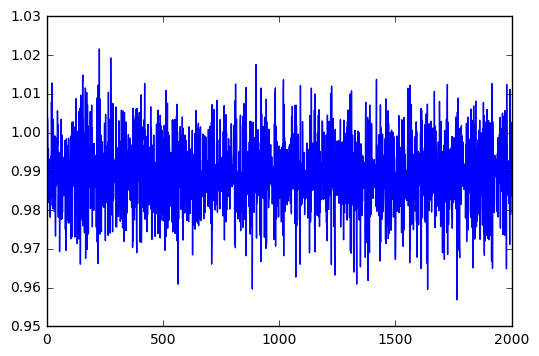

In [50]:
plt.plot(trace['alpha'])

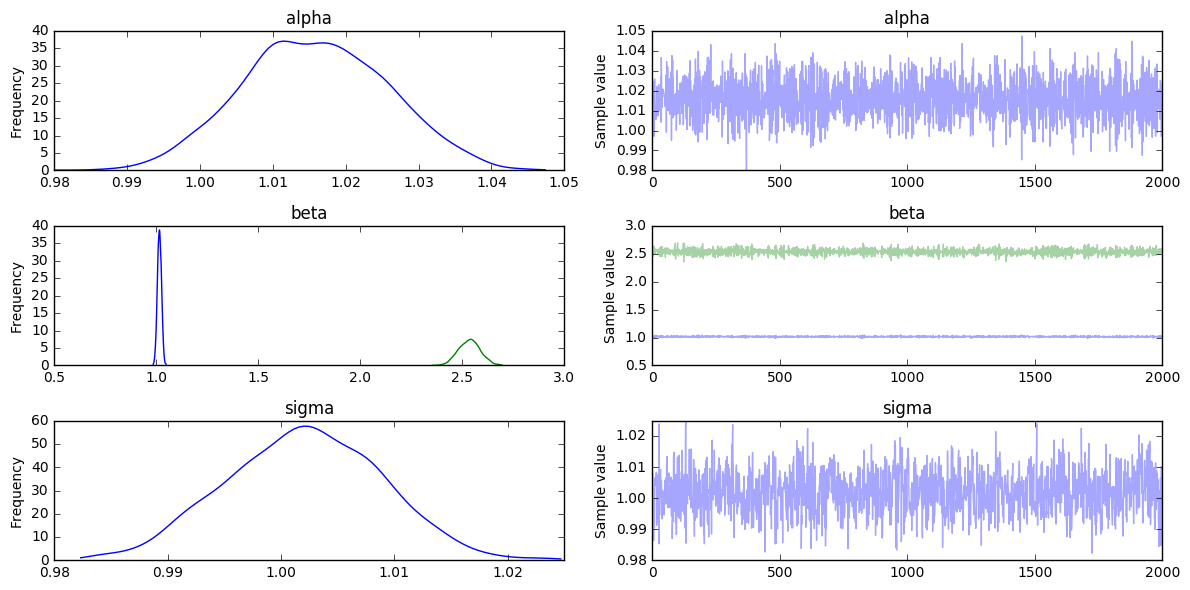

In [47]:
pm.traceplot(trace);

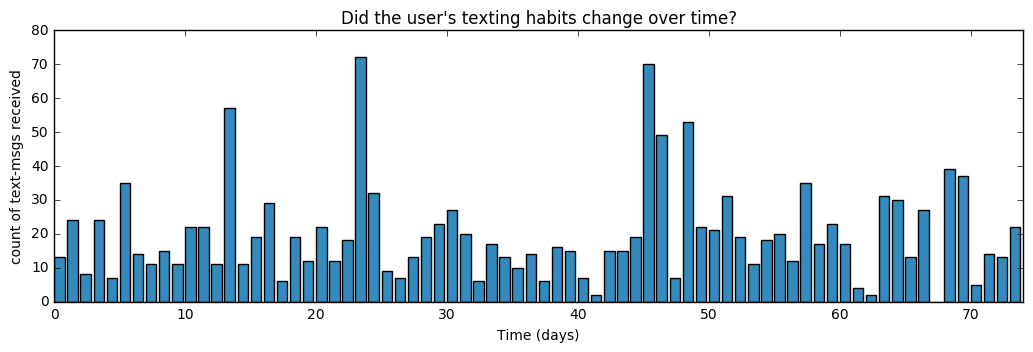

In [3]:
# from
# https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers
# /blob/master/Chapter1_Introduction/Ch1_Introduction_PyMC3.ipynb

url = 'https://raw.githubusercontent.com/CamDavidsonPilon/'
url += 'Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/master/'
url += 'Chapter1_Introduction/data/txtdata.csv'
count_data = pd.read_table(url, header = None).iloc[:, 0].values
n_count_data = len(count_data)

plt.figure(figsize = (12.5, 3.5))
plt.bar(np.arange(n_count_data), count_data, color ="#348ABD")
plt.xlabel('Time (days)')
plt.ylabel('count of text-msgs received')
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data)
plt.show()

In [13]:
alpha = 1.0 / count_data.mean()

model = mc.Model()

with model:
    lambda_1 = mc.Exponential('lambda_1', alpha)
    lambda_2 = mc.Exponential('lambda_2', alpha)
    tau = mc.DiscreteUniform('tau', lower = 0, upper = n_count_data)

Applied log-transform to lambda_1 and added transformed lambda_1_log_ to model.
Applied log-transform to lambda_2 and added transformed lambda_2_log_ to model.
